In [1]:
import sys, os, os.path

!{sys.executable} -m pip install torch
!{sys.executable} -m pip install pandas


from scipy.io import wavfile
import pandas as pd




import torch
import torch.nn as nn


In [2]:

#input_filename = input("Input file name:")
#if input_filename[-3:] != 'wav':
#    print('WARNING!! Input File format should be *.wav')
#    sys.exit()

samrate, data = wavfile.read('./mixture.wav')
samrate_Drums, data_Drums = wavfile.read('./drums.wav')

In [3]:
print(len(data))
print(samrate)

11173050
44100


In [4]:
len(data_Drums)/samrate_Drums/60

4.222619047619047

In [5]:
len(data)/samrate/60

4.222619047619047

In [6]:
#sum(data[:,0] == data[:,1])

In [7]:
#wavfile.write(data=(data - data_Drums), filename='./nodrums.wav', rate=samrate)


In [8]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

(129, 49879)


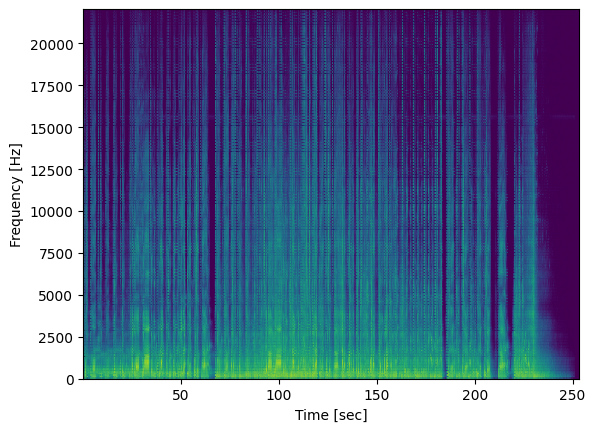

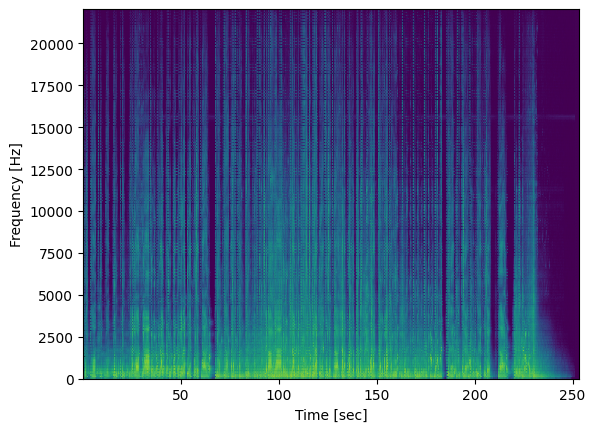

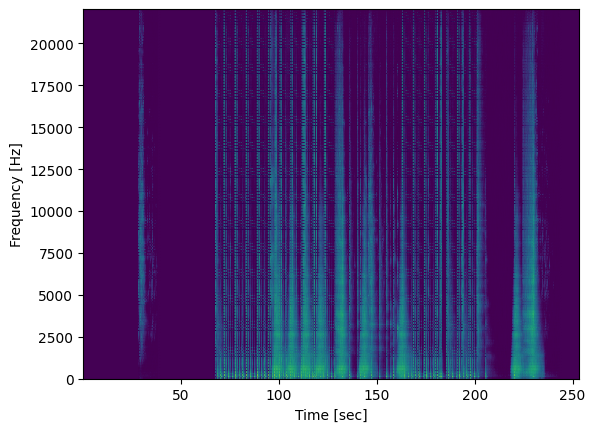

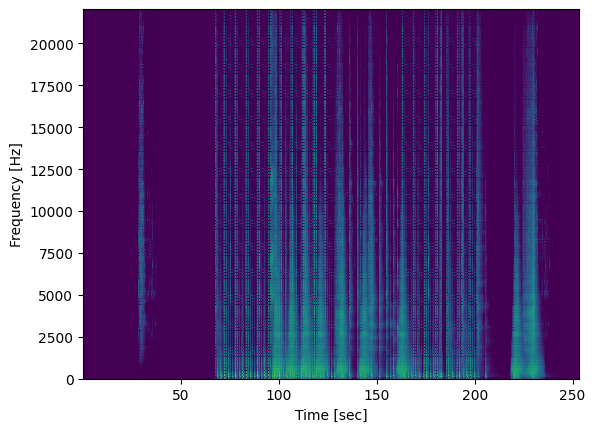

In [13]:
f1, t1, Sxx1 = signal.spectrogram(data[:,0], samrate)
print(Sxx1.shape)
plt.pcolormesh(t1, f1, 10*np.log10(Sxx1 + 0.0001), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

f2, t2, Sxx2 = signal.spectrogram(data[:,1], samrate)
plt.pcolormesh(t2, f2, 10*np.log10(Sxx2 + 0.0001), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

#plt.pcolormesh(t1, f1, Sxx1 - Sxx2, shading='gouraud')
#plt.ylabel('Frequency [Hz]')
#plt.xlabel('Time [sec]')
#plt.show()



f2, t2, Sxx2 = signal.spectrogram(data_Drums[:,0], samrate)
plt.pcolormesh(t2, f2, 10*np.log10(Sxx2 + 0.0001), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


f2, t2, Sxx2 = signal.spectrogram(data_Drums[:,1], samrate)
plt.pcolormesh(t2, f2, 10*np.log10(Sxx2 + 0.0001), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

#f3, t3, Sxx3 = signal.spectrogram(data[:,0] - data_Drums[:,0], samrate)
#plt.pcolormesh(t3, f3, 10*np.log10(Sxx3 + 0.0001), shading='gouraud')
#plt.ylabel('Frequency [Hz]')
#plt.xlabel('Time [sec]')
#plt.show()




In [9]:

class DrumsSplitter(nn.Module):
    def __init__(
        self
        
    ):
        super(DrumsSplitter, self).__init__()
        #self.conv1 = nn.Conv2d(1, 100, 5)
        #self.relu = nn.ReLU()
        #self.maxpool = nn.MaxPool2d(2)
        #self.conv2 = nn.Conv2d(100, 20, 5)        
        
        self.conv1 = nn.Conv2d(1, 10, (6,8), (1,2), (2,0))
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(10, 20, (5,4), (1,2), (2,1))
        self.conv3 = nn.Conv2d(20, 20, (5,6), (1,4), padding=(2,0))
        self.upsamp = nn.Upsample(scale_factor=(2,2))#, output_size=)
        self.convt3 = nn.ConvTranspose2d(20, 20, (5,6), (1,4), padding=(2,0))
        self.convt2 = nn.ConvTranspose2d(20, 10, (5,4), (1,2), (2,1))
        self.convt1 = nn.ConvTranspose2d(10, 1, (6,8), (1,2), (2,0))
        #self.linear2 = nn.Linear()
        
    def forward(
        self,
        x
    ):
        X = self.conv1(x)
        print(X.shape)
        X = self.relu(X)
        X = self.maxpool(X)        
        print(X.shape)
        X = self.conv2(X)
        print(X.shape)
        X = self.relu(X)
        X = self.maxpool(X)
        print(X.shape)
        X = self.conv3(X)
        print(X.shape)
        X = self.relu(X)
        X = self.maxpool(X)
        print(X.shape)
        X = self.upsamp(X)
        print(X.shape)
        X = self.convt3(X, output_size=(1, 20, 32, 3117))
        X = self.relu(X)
        X = self.upsamp(X)
        X = self.convt2(X, output_size=(1, 10, 64, 12468))
        X = self.relu(X)
        X = self.upsamp(X)
        X = self.convt1(X, output_size=(1, 1, 129, 49879))
        X = self.relu(X)
        print("final shape" + str( X.shape))


        return X

In [10]:
print(Sxx1.shape)
model = DrumsSplitter()
inp = torch.tensor(Sxx1)
inp = torch.unsqueeze(inp, 0)
inp = torch.unsqueeze(inp, 0)
X = model.forward(inp)
print(X)

NameError: name 'Sxx1' is not defined

In [85]:
output = X.detach().numpy()[0,0,:,:]
print(output)

[[0.         1.6764977  0.         ... 0.08343095 0.09281334 0.08859036]
 [0.         1.3067108  0.         ... 0.10395209 0.0889733  0.08859036]
 [0.         1.2978766  0.         ... 0.09315333 0.08438092 0.08859036]
 ...
 [0.07204482 0.08872591 0.04393542 ... 0.08946129 0.09883539 0.08859036]
 [0.06868738 0.09789576 0.05982377 ... 0.08568071 0.09092066 0.08859036]
 [0.06344797 0.0993096  0.06445782 ... 0.09276538 0.08204415 0.08859036]]


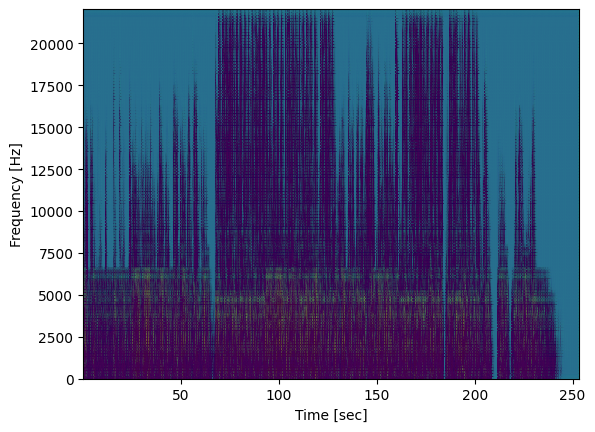

In [86]:
plt.pcolormesh(t2, f2, 10*np.log10(output + 0.0001), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [10]:
def train_batch(X, y, model, optimizer, criterion, **kwargs):
    """
    X (n_examples x n_features)
    y (n_examples): gold labels
    model: a PyTorch defined model
    optimizer: optimizer used in gradient step
    criterion: loss function

    To train a batch, the model needs to predict outputs for X, compute the
    loss between these predictions and the "gold" labels y using the criterion,
    and compute the gradient of the loss with respect to the model parameters.

    Check out https://pytorch.org/docs/stable/optim.html for examples of how
    to use an optimizer object to update the parameters.

    This function should return the loss (tip: call loss.item()) to get the
    loss as a numerical value that is not part of the computation graph.
    """


    # clear the gradients
    optimizer.zero_grad()
    # compute the model output
    yhat = model(X)
    # calculate loss
    loss = criterion(yhat, y)
    # credit assignment
    loss.backward() # computes the gradients.
    optimizer.step() # updates weights using the gradients.

    return loss.item()

In [11]:

def predict(model, X):
    """X (n_examples x n_features)"""
    scores = model(X)  # (n_examples x n_classes)
    predicted_labels = scores.argmax(dim=-1)  # (n_examples)
    return predicted_labels


def evaluate(model, X, y):
    """
    X (n_examples x n_features)
    y (n_examples): gold labels
    """
    model.eval()
    y_hat = predict(model, X)
    n_correct = (y == y_hat).sum().item()
    n_possible = float(y.shape[0])
    model.train()
    return n_correct / n_possible


def plot(epochs, plottable, ylabel='', name=''):
    plt.clf()
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.plot(epochs, plottable)
    plt.savefig('%s.pdf' % (name), bbox_inches='tight')
    plt.show()

In [12]:
import os
# assign directory
directory = './train'
 
# iterate over files in
# that directory
data_train = []
drums_train = []
for folder in os.listdir(directory):
    f = os.path.join(directory, folder)
    # checking if it is a file
    for filename in os.listdir(f):
        f2 = os.path.join(f, filename)
        if os.path.isfile(f2) and "drums" in f2 and "Identifier" not in f2:

            samrate_Drums, data_Drums = wavfile.read(f2)
            drums_train.append(data_Drums)
        elif os.path.isfile(f2) and "mixture" in f2 and "Identifier" not in f2:
            samrate, data = wavfile.read(f2)
            data_train.append(data)
            


In [13]:
def splitIntoOverlapping10s(array):
    leng = len(array)
    splits = []
    currsize = 0
    while(True):
        if currsize + 441000 < leng:
            splits.append(array[currsize:currsize+441000])
            currsize += 220500
        else:
            break
    return splits


In [14]:
x_train = []

for song in data_train:
    splits = splitIntoOverlapping10s(song)
    splits = np.array(splits)
    for split in splits:
        x_train.append(split)



X_train = np.array(x_train)


In [15]:
len(drums_train[0])

8923162

In [16]:
y_train = []

for song in drums_train:
    splits = splitIntoOverlapping10s(song)
    #splits = np.array(splits)
    for split in splits:
        y_train.append(split)



In [17]:
Y_train = np.array(y_train)


: 

: 

In [ ]:
Y_train.shape == X_train.shape
X_train.shape

(4426, 441000)

In [ ]:
x_train = X_train[:,:,0]
y_train = Y_train[:,:,0]



In [31]:
Xs = []
count = 0
for snippet in x_train:
    if count % 100 == 0:
        print(count)
    f, t, Sxx = signal.spectrogram(snippet, samrate)
    Xs.append(Sxx)
    count += 1


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


: 

: 

In [ ]:

def go():

    #utils.configure_seed(seed=42)


    #data = utils.load_classification_data()
    #dataset = utils.ClassificationDataset(data)
    #train_dataloader = DataLoader(
    #    dataset, batch_size=opt.batch_size, shuffle=True)
    #dev_X, dev_y = dataset.dev_X, dataset.dev_y
    #test_X, test_y = dataset.test_X, dataset.test_y

    ## LOAD DATA ##
    #############################################################################################################3

    # initialize the model
    model = DrumsSplitter()
    
    # get an optimizer
    optims = {"adam": torch.optim.Adam, "sgd": torch.optim.SGD}

    optim_cls = optims["adam"]
    optimizer = optim_cls(
        model.parameters(), lr=0.001, weight_decay=0
    )
    
    # get a loss criterion
    criterion = nn.MSELoss()
    
    # training loop
    epochs = np.arange(1, 10 + 1)
    train_mean_losses = []
    valid_accs = []
    train_losses = []
    for ii in epochs:
        print('Training epoch {}'.format(ii))
        for X_batch, y_batch in train_dataloader:
            loss = train_batch(
                X_batch, y_batch, model, optimizer, criterion)
            train_losses.append(loss)

        mean_loss = torch.tensor(train_losses).mean().item()
        print('Training loss: %.4f' % (mean_loss))

        train_mean_losses.append(mean_loss)
        valid_accs.append(evaluate(model, dev_X, dev_y))
        print('Valid acc: %.4f' % (valid_accs[-1]))

    print('Final Test acc: %.4f' % (evaluate(model, test_X, test_y)))
    # plot
    config = "{}-{}-{}-{}".format(0.001, 0, "adam")

    plot(epochs, train_mean_losses, ylabel='Loss', name='CNN-training-loss-{}'.format(config))
    plot(epochs, valid_accs, ylabel='Accuracy', name='CNN-validation-accuracy-{}'.format(config))